### Load the Iris Dataset


In [108]:
import pandas as pd

#Load CSV files
inputs_train=pd.read_csv('datasets/iris_train.csv',usecols = [0,1,2,3],skiprows = None,header=None).values
labels_train = pd.read_csv('datasets/iris_train.csv',usecols = [4],skiprows = None ,header=None).values.reshape(-1)
inputs_test=pd.read_csv('datasets/iris_test.csv',usecols = [0,1,2,3],skiprows = None,header=None).values
labels_test = pd.read_csv('datasets/iris_test.csv',usecols = [4],skiprows = None ,header=None).values.reshape(-1)

#print("Data loaded")
#print("Train set inputs:",inputs_train)
#print("Train set labels:",labels_train)
#print("Test set inputs:",inputs_test)
#print("Test set labels:",labels_test)

#### Build the neural network

In [109]:
import tensorflow as tf
from tensorflow import keras

k_l2=0

keras_model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='tanh',kernel_regularizer=keras.regularizers.l2(k_l2)),
    tf.keras.layers.Dense(20, activation='tanh',kernel_regularizer=keras.regularizers.l2(k_l2)),
    tf.keras.layers.Dense(3, activation='softmax',kernel_regularizer=keras.regularizers.l2(k_l2))
])

keras_model.build(input_shape=[None,4])
keras_model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 20)                100       
                                                                 
 dense_79 (Dense)            (None, 20)                420       
                                                                 
 dense_80 (Dense)            (None, 3)                 63        
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________


#### Train the neural network

In [110]:
keras_model.compile(
    optimizer=tf.keras.optimizers.Adam(), # Optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Loss function to minimize
    metrics=[keras.metrics.SparseCategoricalAccuracy()] # List of metrics to monitor
)

In [111]:
# Train loop

print("Training started ..")

history = keras_model.fit(
    inputs_train,
    labels_train,
    batch_size=len(inputs_train),
    epochs=2000,
    validation_data=(inputs_test, labels_test),
    verbose=0
)

print("Training finished.")

Training started ..
Training finished.


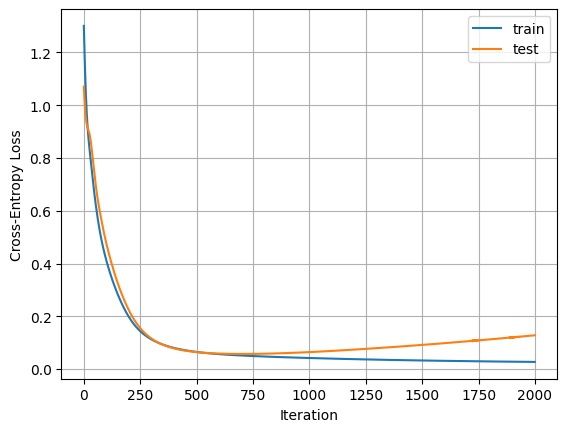

In [112]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")
plt.xlabel("Iteration")
plt.ylabel('Cross-Entropy Loss')
plt.grid()
plt.legend()
plt.show()

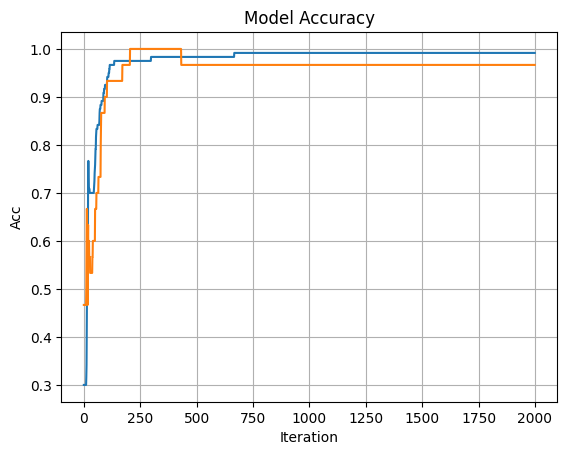

In [113]:
#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.show()

## Save the trained model

In [114]:
keras_model.save("IrisModel")

INFO:tensorflow:Assets written to: IrisModel/assets


## Check we can re-load our saved model back in
- And check it still works (we will print its accuracy on the test set!)

In [115]:
model2 = keras.models.load_model('IrisModel') # just need to give it a folder name here.
model2.summary()
predictions=model2(inputs_test)
accuracy_metric=keras.metrics.SparseCategoricalAccuracy()
print("Accuracy of saved model on test set",accuracy_metric(labels_test,predictions).numpy())

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 20)                100       
                                                                 
 dense_79 (Dense)            (None, 20)                420       
                                                                 
 dense_80 (Dense)            (None, 3)                 63        
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________
Accuracy of saved model on test set 0.96666664
